In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname
import csv

In [4]:
datadir = os.getcwd()

suffix = ['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-163']

datafile_input = []
for i in range(0 , len(suffix)):
    temp = '/ids_{0}.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        input_1_20 = list(reader)
    datafile_input.append(input_1_20)
    
datafile_output = []
for i in range(0 , len(suffix)):
    temp = '/{0}.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        output_1_20 = list(reader)
    datafile_output.append(output_1_20)   

In [5]:
#extract gaia source IDs from the input files
input_ids = []

for j in range(0, len(datafile_input)):
    input_idss = []
    for i in range(0, len(datafile_input[j])):
        input_idss.append(int(datafile_input[j][i][0].split(" ")[2]))
    input_ids.append(input_idss)

In [6]:
#extract gaia source IDs from the output files

output_ids = []

for j in range(0, len(datafile_output)):
    temp = [int(datafile_output[j][i][0]) for i in range(1,len(datafile_output[j]))]
    output_ids.append(temp)

In [7]:
#check if every pair of files (resp. first input and first output file) contain same IDs

for i in range(0, len(output_ids)):
    print(set(output_ids[i]) == set(input_ids[i]))

True
True
True
True
True
True
True
True
True


In [8]:
#now extract all data into lists

output_info = datafile_output[0][0]

In [9]:
output_all = []
for j in range(0, len(datafile_output)):
    #print(j)
    for i in range(0, len(datafile_output[j])-1):
        #print(i)
        temp = datafile_output[j][1:][i]
        output_all.append(temp)

In [10]:
len(output_all)

163

In [11]:
output_info

['source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'phot_g_mean_mag',
 'radial_velocity',
 'radial_velocity_error',
 'phot_variable_flag']

In [12]:
sid = np.array([int(output_all[i][0]) for i in range(0, len(output_all))])
ra = np.array([float(output_all[i][1]) for i in range(0, len(output_all))])
dec = np.array([float(output_all[i][3]) for i in range(0, len(output_all))])

magg = np.array([float(output_all[i][11]) for i in range(0, len(output_all))])
fluxg = 10**(-0.4*np.array(magg))

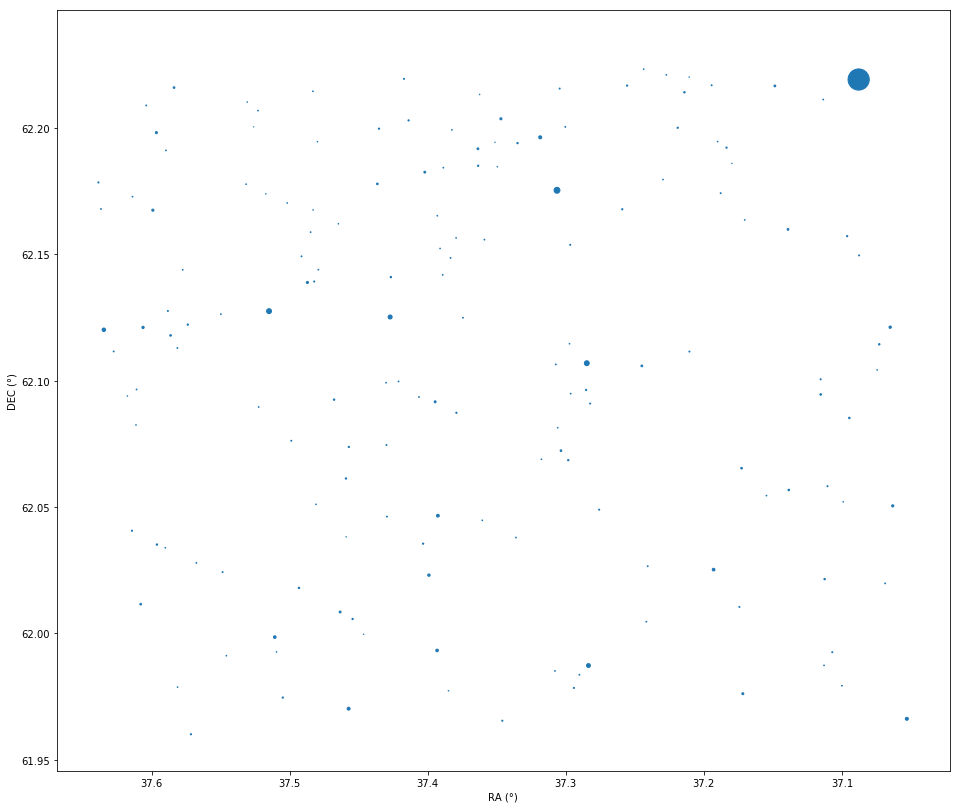

In [13]:
plt.subplots(1,1,figsize=(16,14))
plt.scatter(ra, dec, s=fluxg*5e5)

plt.gca().invert_xaxis()

plt.xlabel('RA (°)')
plt.ylabel('DEC (°)')

plt.show()

In [14]:
#because an (or some) elements in the following lists is not a number we cant convert it yet into floats... 
pax = np.asarray([output_all[i][5] for i in range(0, len(output_all))])
pmra = np.asarray([output_all[i][7] for i in range(0, len(output_all))])
pmdec = np.asarray([output_all[i][9] for i in range(0, len(output_all))])

In [15]:
pax

array(['0.08443430291980539', '3.9491675596363622', '1.3781455638096358',
       '0.8226389887865191', '0.5638482370513794', '0.4464942353563346',
       '0.933871276088717', '16.650070803297115', '0.3976304326473471',
       '0.5604482340803969', '0.31272587510974903', '0.4592195394559038',
       '0.38519873733978865', '0.19708750684099452', '0.1889699588813463',
       '0.23199159361436034', '2.127453456677739', '0.31804947483244744',
       '0.20110605232313256', '0.110303911564383', '0.21300754697308666',
       '0.936264480856408', '0.15701051759055504', '0.551083007109126',
       '0.199854569096885', '0.5853429529293679', '0.2149089944190575',
       '0.3874735129633252', '0.7615088415100537', '0.7028825828645071',
       '1.4912095490273318', '0.9390743219008768', '0.7118154480488237',
       '0.9872520252276171', '0.1326701976706953', '0.47028991615269145',
       '0.642084093168559', '1.1601877598920058', '1.1104615369611',
       '1.6338079340538265', '0.23002666733839575',

In [16]:
'' in pax

True

In [17]:
for i in range(0, len(pax)):
    if pax[i] == '':
        print(i)    
    if pmra[i] == '':
        print(i)
    if pmdec[i] == '':
        print(i)
        
# star 133 resp. element 132 has no pax, pmra & pmdec!
# so the star will be removed from all lists

67
67
67
94
94
94
113
113
113


In [18]:
#remove element 132:

msk_lst = [67, 94, 113]

sid_new = np.delete(sid, msk_lst)
ra_new = np.delete(ra, msk_lst)
dec_new = np.delete(dec, msk_lst)

magg_new = np.delete(magg, msk_lst)
fluxg_new = np.delete(fluxg, msk_lst)

pax_new = np.delete(pax, msk_lst).astype(float)
pmra_new = np.delete(pmra, msk_lst).astype(float)
pmdec_new = np.delete(pmdec, msk_lst).astype(float)

In [19]:
pax_new

array([8.44343029e-02, 3.94916756e+00, 1.37814556e+00, 8.22638989e-01,
       5.63848237e-01, 4.46494235e-01, 9.33871276e-01, 1.66500708e+01,
       3.97630433e-01, 5.60448234e-01, 3.12725875e-01, 4.59219539e-01,
       3.85198737e-01, 1.97087507e-01, 1.88969959e-01, 2.31991594e-01,
       2.12745346e+00, 3.18049475e-01, 2.01106052e-01, 1.10303912e-01,
       2.13007547e-01, 9.36264481e-01, 1.57010518e-01, 5.51083007e-01,
       1.99854569e-01, 5.85342953e-01, 2.14908994e-01, 3.87473513e-01,
       7.61508842e-01, 7.02882583e-01, 1.49120955e+00, 9.39074322e-01,
       7.11815448e-01, 9.87252025e-01, 1.32670198e-01, 4.70289916e-01,
       6.42084093e-01, 1.16018776e+00, 1.11046154e+00, 1.63380793e+00,
       2.30026667e-01, 2.16749290e-01, 4.72120432e-01, 8.86648051e-01,
       8.38019094e-01, 1.28536560e+00, 3.43418803e-01, 2.83181593e-01,
       1.79258792e-01, 2.54235204e-01, 8.82119337e-01, 4.30890974e-01,
       8.17171471e-01, 1.16804960e+00, 5.28373344e-01, 6.51544856e-01,
      

In [20]:
def arrows(x, y, pm_x, pm_y, scale):
    temp = []
    for i in range(0, len(x)):
        temp2 = [x[i], y[i], scale * pm_x[i], scale * pm_y[i]]
        temp.append(temp2)
    return np.array(temp)

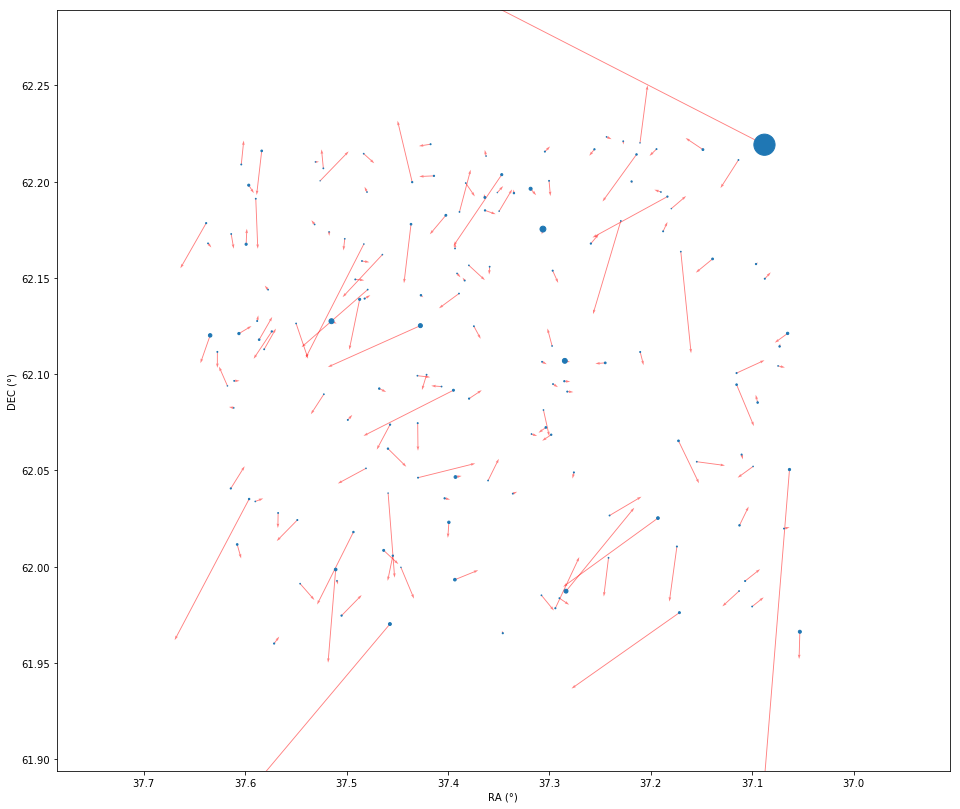

In [21]:
soa = arrows(ra_new, dec_new, pmra_new, pmdec_new, 0.005)


X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(16,14))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.001, alpha=0.5, color='r')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*5e5)

ax.invert_xaxis()

ax.margins(0.25) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

plt.draw()
plt.show()

In [22]:
# convert parallaxes into parsecs
parcs = 1000./np.array(pax_new)

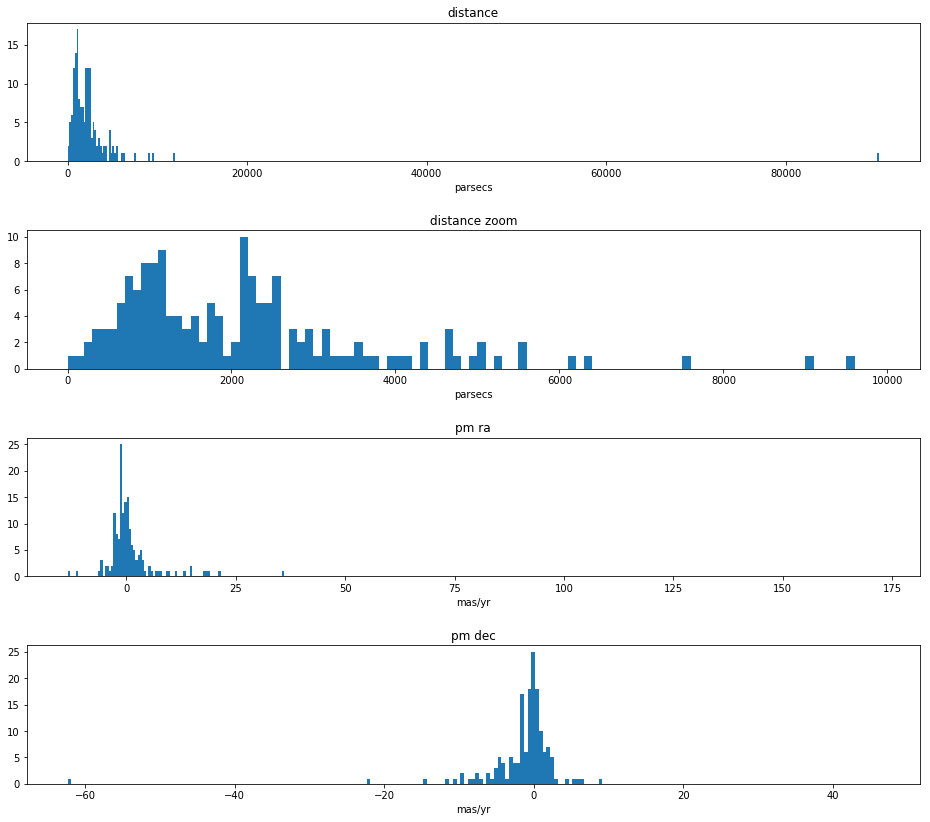

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16,14))
bottom = 0.1
ax1.hist(parcs, bins=np.arange(0,max(parcs)+10,200))
ax2.hist(parcs, bins=np.arange(0,10000,100))
ax3.hist(pmra_new, bins=np.arange(min(pmra_new),max(pmra_new),0.5))
ax4.hist(pmdec_new, bins=np.arange(min(pmdec_new),max(pmdec_new),0.5))

ax1.set_title('distance')
ax2.set_title('distance zoom')
ax3.set_title('pm ra')
ax4.set_title('pm dec')

ax1.set_xlabel('parsecs')
ax2.set_xlabel('parsecs')
ax3.set_xlabel('mas/yr')
ax4.set_xlabel('mas/yr')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [34]:
mask_dist = []
mask_pmra = []
mask_pmde = []

for i in range(len(parcs)):
    #mask_dist.append(400 <= parcs[i] <= 600)
    mask_dist.append(5000 <= parcs[i] <= 8000)
    
for j in range(len(pmra_new)):
    #mask_pmra.append(-5 <= pmra_new[j] <= 5)
    mask_pmra.append(-10 <= pmra_new[j] <= 10)
    
for k in range(len(pmdec_new)):
    #mask_pmde.append(-10 <= pmdec_new[k] <= 0)
    mask_pmde.append(-10 <= pmdec_new[k] <= 10)
    
mask_dist = np.array(mask_dist)
mask_pmra = np.array(mask_pmra)
mask_pmde = np.array(mask_pmde)

mask_cluster = []

for ind in range(max(len(mask_dist),len(mask_pmra),len(mask_pmde))):
    if mask_dist[ind] and mask_pmra[ind] and mask_pmde[ind]:
        mask_cluster.append(True) 
    else:
        mask_cluster.append(False)
        
mask_cluster = np.array(mask_cluster)

In [35]:
mask_cluster

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [36]:
ra_cl = ra_new[mask_cluster]
dec_cl =dec_new[mask_cluster]

pmra_new_cl = pmra_new[mask_cluster]
pmdec_new_cl = pmdec_new[mask_cluster]
parcs_cl = parcs[mask_cluster]

fluxg_cl = fluxg_new[mask_cluster]

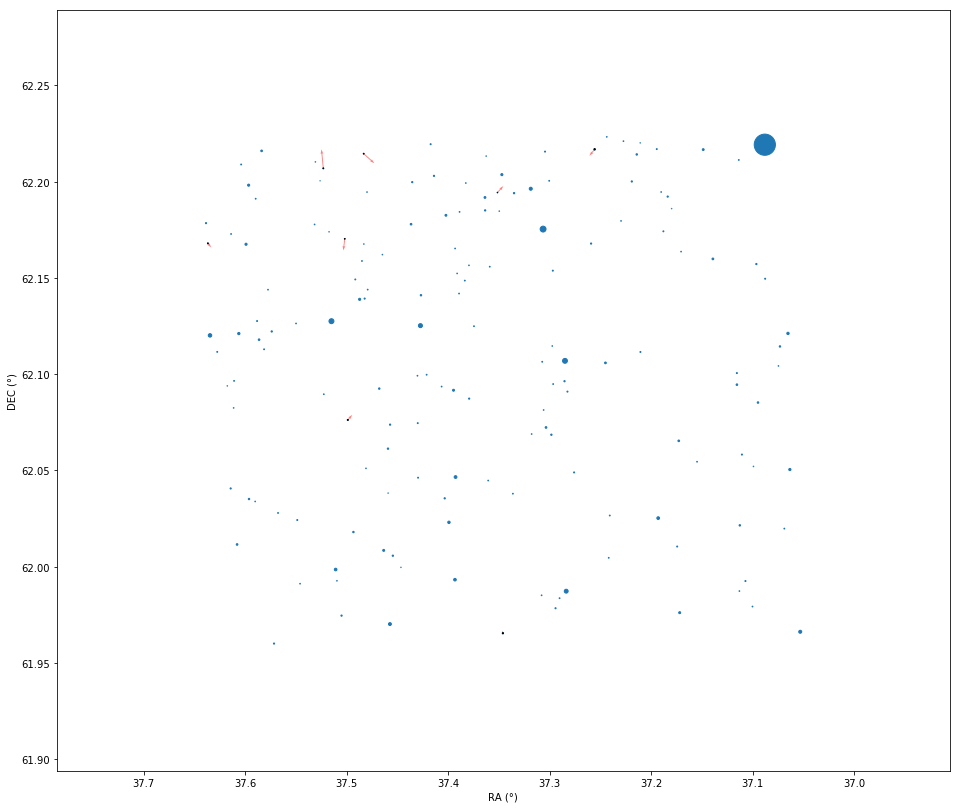

In [37]:
soa = arrows(ra_cl, dec_cl, pmra_new_cl, pmdec_new_cl, 0.005)

X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(16,14))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.001, alpha=0.5, color='r')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*5e5)
ax.scatter(ra_cl, dec_cl, s=np.array(fluxg_cl)*5e5,c='k')

ax.invert_xaxis()

ax.margins(0.25) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

plt.draw()
plt.show()

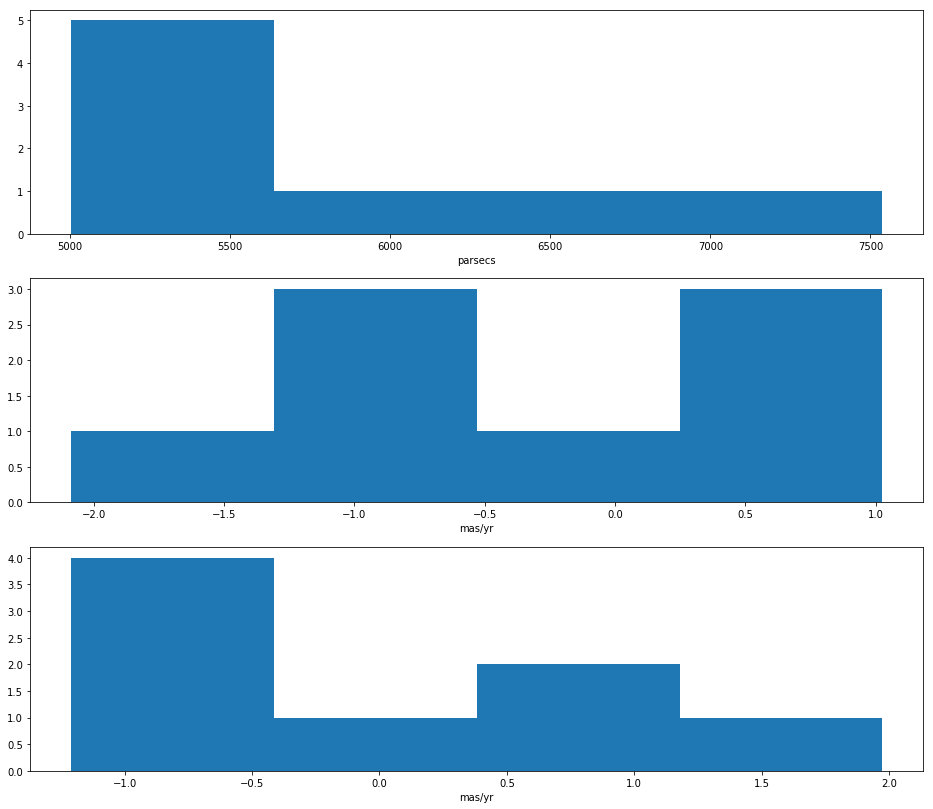

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,14))

_,bins, __ = ax1.hist(parcs_cl, bins='auto')#np.arange(400,600,20)
ax2.hist(pmra_new_cl, bins='auto') #np.arange(min(pmra_new_cl),max(pmra_new_cl),0.2)
ax3.hist(pmdec_new_cl, bins='auto') #np.arange(min(pmdec_new_cl),max(pmdec_new_cl),0.2)
ax1.set_xlabel('parsecs')
ax2.set_xlabel('mas/yr')
ax3.set_xlabel('mas/yr')
#plt.subplots_adjust(hspace=0.5)
plt.show()